# Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pandas_profiling import ProfileReport as pr
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-penerbangan/Jan_2019_ontime.csv


# Preview Data

In [2]:
#load and preview data
df = pd.read_csv('/kaggle/input/data-penerbangan/Jan_2019_ontime.csv')
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


# Cleaning Data

In [5]:
#menghilangkan data yang kosong pada kolom diverted dan canceled
df = df[df['DIVERTED'] == 0]
df = df[df['CANCELLED'] == 0]

In [6]:
#memilih kolom untuk variabel yang akan digunakan, dengan ARR_DEL15 sebagai target variabel
df = df[['DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEP_TIME_BLK', 'ORIGIN', 'DEST', 'DISTANCE', 'ARR_DEL15']]

In [7]:
#untuk menghapus semua baris dengan nilai null
df.dropna()
df = df.reset_index(drop=True)

In [8]:
#melakukan rename kolom DAY_OF_WEEK menjadi ON_WEEK lalu menampilkan 5 data teratas dan 5 data terbawah
df = df.rename(columns = {'DAY_OF_WEEK' : 'ON_WEEK'})
df['ON_WEEK'] = (df['ON_WEEK'] > 5).astype(int)

In [9]:
#mengembalikan jumlah nilai OP_UNIQUE_CARRIER kecuali nilai null
df['OP_UNIQUE_CARRIER'].nunique()

17

In [10]:
#mencari data carrier berdasarkan grup OP_UNIQUE_CARRIER dan digabungkan dengan urutan terkecil
carrier_df = df[['OP_UNIQUE_CARRIER','ARR_DEL15']].groupby('OP_UNIQUE_CARRIER').sum().sort_values(by='ARR_DEL15',ascending=False)
carrier_df['CARRIER'] = pd.qcut(carrier_df['ARR_DEL15'], 17, labels = False) #17 dari nunique
carrier_df

,ARR_DEL15,CARRIER
OP_UNIQUE_CARRIER,,
WN,16111.0,16
OO,14024.0,15
AA,13741.0,14
DL,9403.0,13
UA,9156.0,12
B6,6429.0,11
YX,5864.0,10
MQ,5844.0,9
9E,4013.0,8


In [11]:
#melakukan reset pada loc OP_UNIQUE_CARRIER dengan digantikan data CARRIER
data_carrier = carrier_df.loc[df['OP_UNIQUE_CARRIER']].reset_index()
df['CARRIER'] = data_carrier['CARRIER']

In [12]:
#mengembalikan jumlah nilai DEP_TIME_BLK kecuali nilai null
df['DEP_TIME_BLK'].nunique()

19

In [13]:
#mencari data depart time berdasarkan grup DEP_TIME_BLK dan digabungkan dengan urutan terkecil
time_blk_df = df[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk_df['Depart_TIME'] = pd.qcut(time_blk_df['ARR_DEL15'], 19, labels = False) #19 dari nunique
time_blk_df

,ARR_DEL15,Depart_TIME
DEP_TIME_BLK,,
1700-1759,8270.0,18
1800-1859,7978.0,17
1600-1659,7576.0,16
1400-1459,7290.0,15
1500-1559,7281.0,14
1900-1959,7219.0,13
1200-1259,6639.0,12
1300-1359,6398.0,11
1100-1159,6361.0,10


In [14]:
#melakukan reset pada loc DEP_TIME_BLK dengan digantikan data Depart_TIME
data_time = time_blk_df.loc[df['DEP_TIME_BLK']].reset_index()
df['Depart_TIME'] = data_time['Depart_TIME']

In [15]:
#mengembalikan jumlah nilai ORIGIN kecuali nilai null
df['ORIGIN'].nunique()

346

In [16]:
#mencari data origin berdasarkan grup ORIGIN dan digabungkan dengan urutan terkecil
origin_df = df[['ORIGIN','ARR_DEL15']].groupby('ORIGIN').sum().sort_values(by='ARR_DEL15',ascending=False)
origin_df['Depart_ORIGIN'] = pd.qcut(origin_df['ARR_DEL15'], 25, labels = False) #25 dari nunique
origin_df

,ARR_DEL15,Depart_ORIGIN
ORIGIN,,
ORD,7655.0,24
DFW,4322.0,24
LGA,4075.0,24
ATL,4013.0,24
SFO,3562.0,24
...,...,...
BRW,2.0,0
ADK,1.0,0
CPR,1.0,0


In [17]:
#melakukan reset pada loc ORIGIN dengan digantikan data Depart_ORIGIN
data_origin = origin_df.loc[df['ORIGIN']].reset_index()
df['Depart_ORIGIN'] = data_origin['Depart_ORIGIN']

In [18]:
#mengembalikan jumlah nilai DEST kecuali nilai null
df['DEST'].nunique()

346

In [19]:
#mencari data origin berdasarkan grup DEST dan digabungkan dengan urutan terkecil
dest_df = df[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_df['DESTINATE'] = pd.qcut(dest_df['ARR_DEL15'], 25, labels = False) 
dest_df

,ARR_DEL15,DESTINATE
DEST,,
ORD,6441.0,24
LGA,4836.0,24
DFW,4282.0,24
ATL,3931.0,24
SFO,3642.0,24
...,...,...
CPR,3.0,0
STC,2.0,0
PPG,2.0,0


In [20]:
#melakukan reset pada loc DEST dengan digantikan data DESTINATE
data_dest = dest_df.loc[df['DEST']].reset_index()
df['DESTINATE'] = data_dest['DESTINATE']

In [21]:
#Mendefinisikan variabel dengan nama yang sudah diganti
df = df[['ON_WEEK', 'CARRIER','Depart_TIME', 'Depart_ORIGIN', 'DESTINATE', 'DISTANCE', 'ARR_DEL15']]
df

,ON_WEEK,CARRIER,Depart_TIME,Depart_ORIGIN,DESTINATE,DISTANCE,ARR_DEL15
0,0,8,4,12,24,300,0.0
1,0,8,15,23,22,596,0.0
2,0,8,12,24,22,229,0.0
3,0,8,14,14,24,223,0.0
4,0,8,13,24,8,579,0.0
...,...,...,...,...,...,...,...
565958,0,12,5,3,21,3801,0.0
565959,0,12,5,3,3,129,0.0
565960,0,12,6,3,5,129,0.0
565961,0,12,17,3,5,129,0.0


# Membuat Data Agar Balance Menggunakan SMOTE

In [22]:
df_X = df.drop('ARR_DEL15', axis=1) #variabel X untuk variabel selain ARR_DEL15
df_y =  df[['ARR_DEL15']] #variabel y untuk variabel ARR_DEL15

In [23]:
X = df_X.values
y = df_y.values

In [24]:
#LabelBinarizer untuk menerima data Categorical sebagai input dan mengembalikan array Numpy.
y = LabelBinarizer().fit_transform(y)

In [25]:
#menghitung jumlah dari data apakah seimbang atau tidak
df_y.value_counts()

ARR_DEL15
0.0          460741
1.0          105222
dtype: int64

In [26]:
#SMOTE digunakan untuk membuat data menjadi balance karena data yang ada sangat tidak seimbang (977724 baris untuk kelas '0=tepat waktu' dan '187507 baris untuk kelas '1= tertunda')
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
X = StandardScaler().fit_transform(X) #melakukan normalisasi data agar tidak memiliki penyimpangan yang besar.
X = MinMaxScaler().fit_transform(X) #mengubah data berada di rentang 0 sampai 1

In [28]:
#mendefinisikan array pada variabel X
X 

array([[0.        , 0.5       , 0.22222222, 0.5       , 1.        ,
        0.05432149],
       [0.        , 0.5       , 0.83333333, 0.95833333, 0.91666667,
        0.11409532],
       [0.        , 0.5       , 0.66666667, 1.        , 0.91666667,
        0.03998384],
       ...,
       [0.        , 0.9375    , 0.72222222, 1.        , 0.20833333,
        0.01655897],
       [0.        , 0.9375    , 0.11111111, 1.        , 0.70833333,
        0.0151454 ],
       [0.        , 1.        , 0.16666667, 0.95833333, 0.66666667,
        0.16276252]])

# Membuat Model Data

In [29]:
#melakukan split data dengan data test sebesar 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
#untuk membuat model decision tree classifier
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [31]:
#membuat model predict pada variabel 
y_pred_test = model.predict(X_test)

In [32]:
#nantinya akan digunakan untuk mencari cross validation dengan split = 5 artinya per data akan dibagi 5
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = DecisionTreeClassifier()

In [33]:
#cross validation digunakan untuk mengetahui akurasi 
result = cross_val_score(model, X, y, cv = kfold)
print(result)

[0.71539417 0.71574144 0.71451903 0.71654838 0.71778552]


In [34]:
#mengetahui rata rata dari akurasi 
print(result.mean())

0.7159977089729429


In [42]:
#mengetahui confusion matrix
print(confusion_matrix(y_test, y_pred_test))

[[63131 28769]
 [23589 68808]]


In [36]:
#mengetahui nilai precision, recall, f1, support dari confusion matrix 
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     91900
           1       0.71      0.74      0.72     92397

    accuracy                           0.72    184297
   macro avg       0.72      0.72      0.72    184297
weighted avg       0.72      0.72      0.72    184297



# Menghitung Prediksi

In [37]:
#menghitung data prediksi
Data =[[0, 0.5, 0.22222222, 0.5, 1, 0.05432149],
      [0, 0.5, 0.83333333, 0.95833333, 0.91666667, 0.11409532]]
#melakukan predksi
model.fit(X,y)
y_pred = model.predict(Data)

print("Hasil dari prediksi : Arrive Delay", y_pred)

Hasil dari prediksi : Arrive Delay [0 0]


# Visualisasi Data

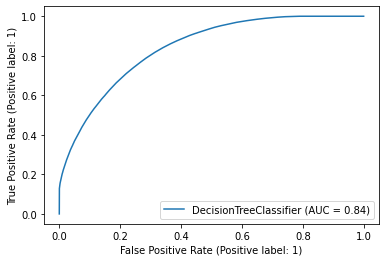

In [38]:
#menggunakan model plot AUC (Jika AUC=50% model tidak berguna karena salah 50% dari waktu. Jika AUC=100% modelnya sempurna.)
plot_roc_curve(model, X_test, y_test)

In [ ]:
from sklearn import tree
tree.plot_tree(model)

[Text(170.74980102368588, 214.85142857142856, 'X[0] <= 0.5\ngini = 0.5\nsamples = 921482\nvalue = [460741, 460741]'),
 Text(88.63544861116485, 209.6742857142857, 'X[2] <= 0.417\ngini = 0.497\nsamples = 760209\nvalue = [352787, 407422]'),
 Text(48.77499671430737, 204.49714285714285, 'X[1] <= 0.969\ngini = 0.497\nsamples = 242491\nvalue = [131195, 111296]'),
 Text(36.563135239027076, 199.32, 'X[1] <= 0.906\ngini = 0.499\nsamples = 203700\nvalue = [105682, 98018]'),
 Text(23.101975912995144, 194.14285714285714, 'X[1] <= 0.719\ngini = 0.498\nsamples = 177181\nvalue = [93683, 83498]'),
 Text(11.99117485436262, 188.96571428571428, 'X[1] <= 0.531\ngini = 0.5\nsamples = 92135\nvalue = [45358, 46777]'),
 Text(2.64858417873693, 183.78857142857143, 'X[5] <= 0.029\ngini = 0.499\nsamples = 56394\nvalue = [29521, 26873]'),
 Text(0.4468868291089285, 178.61142857142858, 'X[1] <= 0.031\ngini = 0.418\nsamples = 3734\nvalue = [2623, 1111]'),
 Text(0.10508182625532206, 173.43428571428572, 'X[2] <= 0.194\n